# Modelo Predictivo: Random Forest Regressor

En este notebook se entrena un modelo de **Regresión con Random Forest** para predecir el precio promedio del aguacate (`AveragePrice`) en función de diversas características como el tipo, región, volumen de ventas y fecha.

El dataset utilizado (`avocado_final_clean.csv`) ya ha sido sometido a un proceso previo de:
- Limpieza de valores nulos  
- Tratamiento de outliers  
- Codificación de variables categóricas  
- Estandarización de variables predictoras  

---


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns

# Cargar el dataset limpio y estandarizado
df = pd.read_csv("avocado_final_clean.csv")

print(f"✅ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()


✅ Dataset cargado: 18249 filas y 68 columnas


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,-0.607128,-0.690114,-0.332446,-0.646057,-0.744399,-0.701162,-0.703685,-0.600511,-1.221282,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.632411,-0.693767,-0.406178,-0.644361,-0.735706,-0.689621,-0.703476,-0.600511,-1.221282,...,0,0,0,0,0,0,0,0,0,0
2,0.93,-0.461299,-0.692553,0.078387,-0.632323,-0.750328,-0.709217,-0.703196,-0.600511,-1.221282,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.567268,-0.689155,-0.200835,-0.641984,-0.775421,-0.743145,-0.701682,-0.600511,-1.221282,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.642778,-0.691074,-0.412191,-0.641450,-0.771413,-0.738713,-0.698521,-0.600511,-1.221282,...,0,0,0,0,0,0,0,0,0,0


## Separación de Variables

El modelo debe predecir el **precio promedio del aguacate (`AveragePrice`)**, por lo tanto:

- **Variable objetivo (`y`)**: `AveragePrice`
- **Variables predictoras (`X`)**: todas las demás columnas del dataset.

Se separan ambas para permitir el entrenamiento supervisado del modelo.


In [2]:
# Separar variable objetivo y variables predictoras
target = "AveragePrice"
X = df.drop(columns=[target])
y = df[target]

print("Variable objetivo: {target}")
print("Variables predictoras: {X.shape[1]}")


Variable objetivo: {target}
Variables predictoras: {X.shape[1]}


##  División de Datos: Entrenamiento y Prueba

Para evaluar correctamente el desempeño del modelo, se divide el dataset en dos partes:

- **Conjunto de Entrenamiento (80%)**: usado para entrenar el modelo.
- **Conjunto de Prueba (20%)**: usado para medir qué tan bien generaliza el modelo a datos no vistos.

La división se realiza con `train_test_split`, fijando una semilla aleatoria (`random_state=42`) para garantizar reproducibilidad.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")


📊 Entrenamiento: (14599, 67), Prueba: (3650, 67)


## Entrenamiento del Modelo: Random Forest Regressor

Se emplea el algoritmo **Random Forest**, un método de *ensembles* basado en la combinación de múltiples árboles de decisión.

### Parámetros utilizados:
- `n_estimators=200` → número de árboles en el bosque.
- `max_depth=None` → los árboles crecen sin límite de profundidad.
- `random_state=42` → garantiza resultados reproducibles.
- `n_jobs=-1` → usa todos los núcleos del procesador para acelerar el entrenamiento.


In [4]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("✅ Modelo Random Forest entrenado correctamente.")

✅ Modelo Random Forest entrenado correctamente.


## Evaluación del Desempeño del Modelo

Una vez entrenado el modelo, se evalúa utilizando el conjunto de prueba con las siguientes métricas:

- **MAE (Mean Absolute Error)** → mide el error promedio absoluto.
- **RMSE (Root Mean Squared Error)** → penaliza más los errores grandes.
- **R² (Coeficiente de Determinación)** → indica el grado de ajuste (1 = ajuste perfecto).

Estas métricas permiten entender la precisión y estabilidad del modelo.


In [5]:
# Predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📈 Resultados del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")


📈 Resultados del modelo:
MAE  (Error Absoluto Medio): 0.0852
RMSE (Raíz del Error Cuadrático Medio): 0.1194
R²   (Coeficiente de Determinación): 0.9087


## Análisis de Importancia de Variables

El modelo Random Forest permite conocer qué variables influyen más en la predicción.

Esto se calcula a partir de la **importancia promedio de las características** en la reducción del error dentro de los árboles.

A continuación se muestran las 10 variables más relevantes.


In [6]:
importances = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

importances.head(10)


,Variable,Importancia
13,type_organic,0.390561
6,Large Bags,0.079978
1,4046,0.076181
2,4225,0.065080
12,week,0.057490
10,month,0.046742
8,year,0.033117
9,year_date,0.031596
4,Total Bags,0.029942
0,Total Volume,0.027245


## Visualización de Importancia de Variables

Para una mejor interpretación visual, se muestra un gráfico de barras con las 10 variables más influyentes en el precio promedio del aguacate.


/home/rony/Documentos/CienciaDato/Proyecto 2/2025-2-CienciaDeDatosProyecto2/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


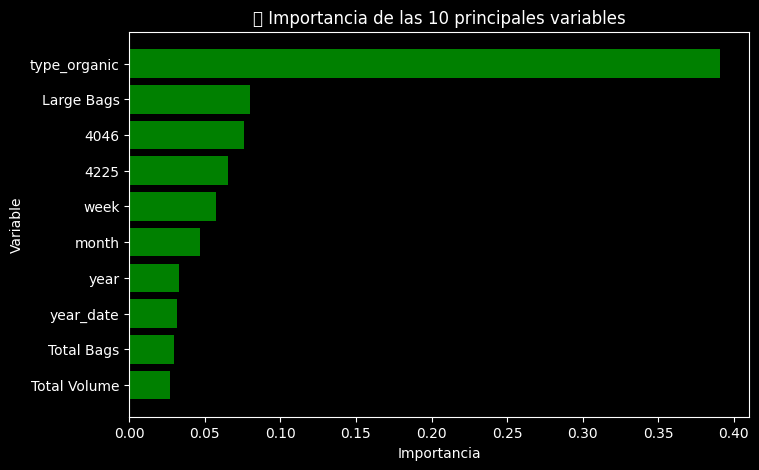

In [ ]:
import matplotlib.pyplot as plt

top10 = importances.head(10)
plt.figure(figsize=(8, 5))
plt.barh(top10["Variable"], top10["Importancia"], color='green')
plt.gca().invert_yaxis()
plt.title("Importancia de las 10 principales variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


## Exportar Resultados

Por último, se exporta la tabla de importancias de variables a un archivo `.csv` para posibles análisis posteriores o visualizaciones en herramientas externas.


In [8]:
importances.to_csv("rf_feature_importance.csv", index=False)
print("💾 Archivo exportado: rf_feature_importance.csv")


💾 Archivo exportado: rf_feature_importance.csv


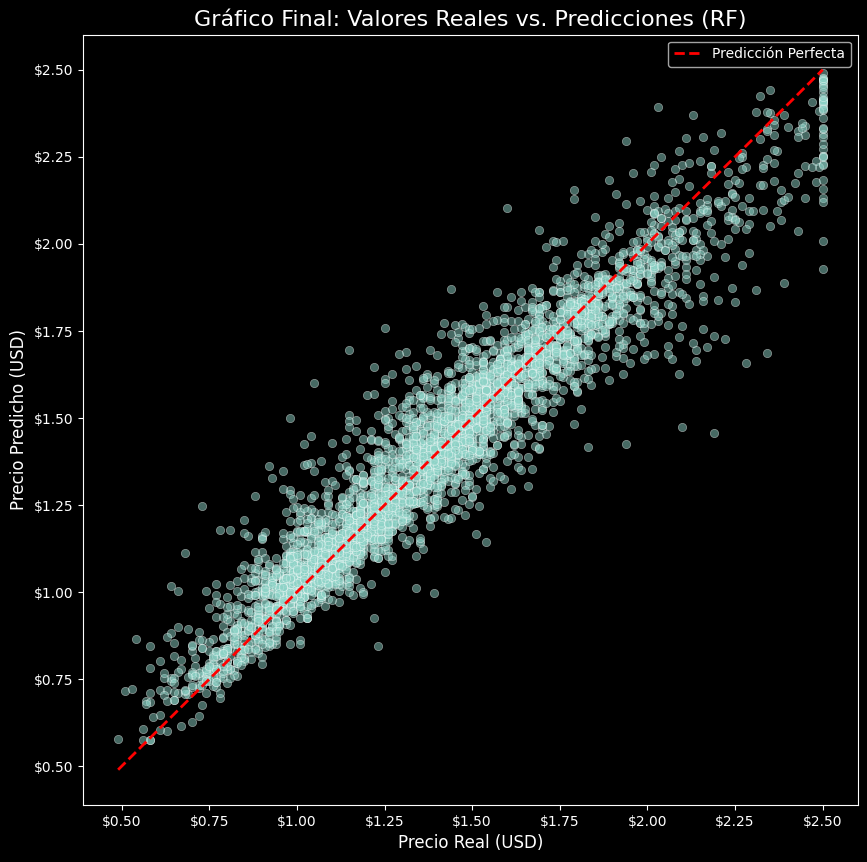

In [9]:
import matplotlib.ticker as mtick 

plt.figure(figsize=(10, 10))
# Creamos un scatter plot de los valores reales vs. los predichos
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Dibujamos la línea de predicción perfecta (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')

plt.title('Gráfico Final: Valores Reales vs. Predicciones (RF)', fontsize=16)
plt.xlabel('Precio Real (USD)', fontsize=12)
plt.ylabel('Precio Predicho (USD)', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.legend()
plt.show()